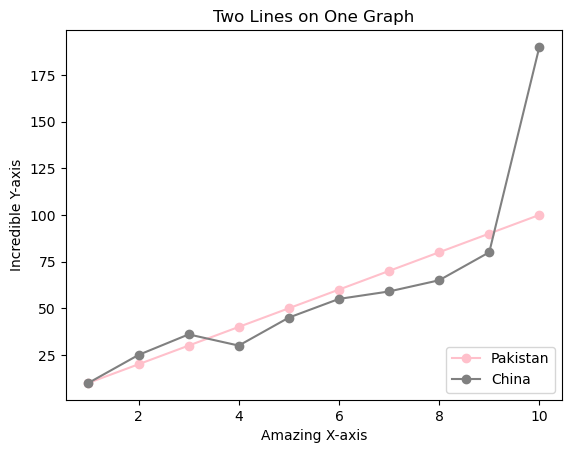

In [5]:
#Task 1
from matplotlib import pyplot as plt

# Define three lists
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y1 = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
y2 = [10, 25, 36, 30, 45, 55, 59, 65, 80, 190]

# Plot y1 vs x with pink line and round markers
plt.plot(x, y1, color='pink', linestyle='-', marker='o', label='Pakistan')

# Plot y2 vs x with gray line and round markers
plt.plot(x, y2, color='gray', linestyle='-', marker='o', label='China')

# Set graph title and labels
plt.title("Two Lines on One Graph")
plt.xlabel("Amazing X-axis")
plt.ylabel("Incredible Y-axis")

# Add legend in the lower right corner
plt.legend(loc='lower right')

# Display the plot
plt.show()

In [9]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import numpy as np

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

k_values = list(range(1, len(X_train) + 1))  

accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    
    accuracy = metrics.accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

max_accuracy_index = np.argmax(accuracies)
min_accuracy_index = np.argmin(accuracies)
best_k = k_values[max_accuracy_index]
worst_k = k_values[min_accuracy_index]

print(f"Highest Accuracy: {accuracies[max_accuracy_index]} (k = {best_k})")
print(f"Lowest Accuracy: {accuracies[min_accuracy_index]} (k = {worst_k})")

Highest Accuracy: 1.0 (k = 1)
Lowest Accuracy: 0.28888888888888886 (k = 74)


In [11]:
#Task 3
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import numpy as np

iris = load_iris()
X = iris.data
y = iris.target

k_values = list(range(1, len(X) + 1))  

for random_seed in range(1, 11):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed)

    accuracies = []

    for k in k_values:
        if k <= len(X_train):  
            knn = KNeighborsClassifier(n_neighbors=k)

            knn.fit(X_train, y_train)

            y_pred = knn.predict(X_test)

            accuracy = metrics.accuracy_score(y_test, y_pred)
            accuracies.append(accuracy)
        else:
            accuracies.append(0.0)  

    max_accuracy_index = np.argmax(accuracies)
    min_accuracy_index = np.argmin(accuracies)
    best_k = k_values[max_accuracy_index]
    worst_k = k_values[min_accuracy_index]

    print(f"Random Seed: {random_seed}")
    print(f"Highest Accuracy: {accuracies[max_accuracy_index]} (k = {best_k})")
    print(f"Lowest Accuracy: {accuracies[min_accuracy_index]} (k = {worst_k})")
    print("\n")

overall_max_accuracy = max(accuracies)
overall_min_accuracy = min(accuracies)
overall_max_index = np.argmax(accuracies)
overall_min_index = np.argmin(accuracies)
best_k_overall = k_values[overall_max_index]
worst_k_overall = k_values[overall_min_index]

print("Overall Results:")
print(f"Highest Accuracy: {overall_max_accuracy} (k = {best_k_overall})")
print(f"Lowest Accuracy: {overall_min_accuracy} (k = {worst_k_overall})")

Random Seed: 1
Highest Accuracy: 0.9777777777777777 (k = 1)
Lowest Accuracy: 0.0 (k = 106)


Random Seed: 2
Highest Accuracy: 1.0 (k = 1)
Lowest Accuracy: 0.0 (k = 106)


Random Seed: 3
Highest Accuracy: 0.9777777777777777 (k = 9)
Lowest Accuracy: 0.0 (k = 106)


Random Seed: 4
Highest Accuracy: 0.9777777777777777 (k = 3)
Lowest Accuracy: 0.0 (k = 106)


Random Seed: 5
Highest Accuracy: 1.0 (k = 8)
Lowest Accuracy: 0.0 (k = 106)


Random Seed: 6
Highest Accuracy: 0.9777777777777777 (k = 5)
Lowest Accuracy: 0.0 (k = 106)


Random Seed: 7
Highest Accuracy: 0.9555555555555556 (k = 2)
Lowest Accuracy: 0.0 (k = 106)


Random Seed: 8
Highest Accuracy: 0.9777777777777777 (k = 7)
Lowest Accuracy: 0.0 (k = 106)


Random Seed: 9
Highest Accuracy: 1.0 (k = 1)
Lowest Accuracy: 0.0 (k = 106)


Random Seed: 10
Highest Accuracy: 1.0 (k = 6)
Lowest Accuracy: 0.0 (k = 106)


Overall Results:
Highest Accuracy: 1.0 (k = 6)
Lowest Accuracy: 0.0 (k = 106)


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import confusion_matrix

# Step 1: Download the Dermatology dataset from UCI
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/dermatology/dermatology.data"
column_names = ["erythema", "scaling", "definite_borders", "itching", "koebner_phenomenon", 
                "polygonal_papules", "follicular_papules", "oral_mucosal_involvement", 
                "knee_and_elbow_involvement", "scalp_involvement", "family_history", "melanin_incontinence", 
                "eosinophils_infiltrate", "PNL_infiltrate", "fibrosis_of_the_papillary_dermis", "exocytosis", 
                "acanthosis", "hyperkeratosis", "parakeratosis", "clubbing_of_the_rete_ridges", 
                "elongation_of_the_rete_ridges", "thinning_of_the_suprapapillary_epidermis", 
                "spongiform_pustule", "munro_microabcess", "focal_hypergranulosis", "disappearance_of_the_granular_layer", 
                "vacuolisation_and_damage_of_basal_layer", "spongiosis", "saw-tooth_appearance_of_retes", 
                "follicular_horn_plug", "perifollicular_parakeratosis", "inflammatory_monoluclear_inflitrate", 
                "band-like_infiltrate", "Age", "Class"]

dermatology_data = pd.read_csv(url, header=None, names=column_names, na_values="?")

# Step 2: Handle missing values
dermatology_data.dropna(inplace=True)

# Step 3: Split the data into features (X) and target (y)
X = dermatology_data.drop("Class", axis=1)
y = dermatology_data["Class"]

# Step 4: Random train/test split (70%, 30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Apply KNN with 10-Fold Cross Validation
k_values = list(range(1, 21))  # You can adjust the range of k values
cv = KFold(n_splits=10, shuffle=True, random_state=42)

best_k = None
best_accuracy = 0

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    cross_val_scores = cross_val_score(knn, X_train, y_train, cv=cv)
    mean_accuracy = cross_val_scores.mean()

    if mean_accuracy > best_accuracy:
        best_accuracy = mean_accuracy
        best_k = k

# Step 6: Train the KNN classifier with the best k on the entire training set
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)

# Step 7: Evaluate on the test set and display the confusion matrix
y_pred = best_knn.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Best k: {best_k}")
print(f"Accuracy on Test Set: {best_knn.score(X_test, y_test)}")
print("Confusion Matrix:")
print(conf_matrix)


URLError: <urlopen error Tunnel connection failed: 403 Forbidden>